In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Text Preprocessing

In [2]:
tweets=pd.read_csv('tweets.csv')

In [3]:
tweets.head()

,Unnamed: 0,post,label
0,0,What Huffington Post Gets Wrong about #WhyISta...,#WhyIStayed
1,1,None,#WhyIStayed
2,2,"if u ignore me , i'll ignore u . if u don't st...",#WhyIStayed
3,3,In #domesticViolence #Shelters the topic of #W...,#WhyIStayed
4,4,None,#WhyIStayed


In [4]:
tweets.drop(columns='Unnamed: 0', inplace=True)

In [5]:
tweets.head()

,post,label
0,What Huffington Post Gets Wrong about #WhyISta...,#WhyIStayed
1,None,#WhyIStayed
2,"if u ignore me , i'll ignore u . if u don't st...",#WhyIStayed
3,In #domesticViolence #Shelters the topic of #W...,#WhyIStayed
4,None,#WhyIStayed


In [6]:
tweets.shape

(30377, 2)

In [7]:
#check for empty rows
tweets.post.isna().any()

False

In [8]:
tweets[tweets.post=='None'].value_counts()

post  label      
None  #WhyIStayed    7120
      #WhyILeft      2786
dtype: int64

In [9]:
df=tweets[tweets.post!='None'].reset_index(drop=True)

In [10]:
df.head()

,post,label
0,What Huffington Post Gets Wrong about #WhyISta...,#WhyIStayed
1,"if u ignore me , i'll ignore u . if u don't st...",#WhyIStayed
2,In #domesticViolence #Shelters the topic of #W...,#WhyIStayed
3,7 painful yrs later I accepted that possessio...,#WhyILeft
4,#WhyIStayed because I do believe people can ch...,#WhyIStayed


## Flesch reading scores

In [11]:
import textstat

In [12]:
df['reading_score']=df.post.apply(textstat.flesch_reading_ease)

In [13]:
df.reading_score.head()

0    28.50
1    87.72
2    35.27
3    74.19
4    80.58
Name: reading_score, dtype: float64

## Emojis

In [14]:
#replace emojis
import demoji

In [15]:
emojis=df.post.apply(demoji.findall)

In [16]:
emojis[emojis!={}].head()

171                               {'🙌': 'raising hands'}
195                               {'👊': 'oncoming fist'}
290                                   {'👍': 'thumbs up'}
315                                   {'👍': 'thumbs up'}
406    {'😱': 'face screaming in fear', '😷': 'face wit...
Name: post, dtype: object

In [17]:
df.post[17107]

'See.... 😕😐😒 "@KicksAddiction: 💀💀💀💀RT @MayaAngelouFRO: I JUST DIED #WhyIStayed http://t.co/JUlUB15irS“"'

In [18]:
def replace_emoji(text):
    emojis=demoji.findall(text)
    for i in range(len(emojis)):
        text=text.replace(list(emojis.keys())[i], ' emoji'+list(emojis.values())[i].replace(' ', '')+' ')
        
    return text

In [19]:
df['processed_post']=df.post.apply(replace_emoji)

In [20]:
df.processed_post[17107]

'See....  emojiconfusedface  emojineutralface  emojiunamusedface  "@KicksAddiction:  emojiskull  emojiskull  emojiskull  emojiskull RT @MayaAngelouFRO: I JUST DIED #WhyIStayed http://t.co/JUlUB15irS“"'

In [21]:
df['emojis']=df.processed_post.apply(lambda x: x.count('emoji'))

In [22]:
df.emojis[17107]

7

In [23]:
df.emojis.value_counts(normalize=True)

0    0.989790
1    0.006595
2    0.002296
3    0.000977
4    0.000147
5    0.000098
6    0.000049
7    0.000049
Name: emojis, dtype: float64

## Mentions and hashtags

In [24]:
import re

In [25]:
#preserve the number of mentions
df['mentions']=df.processed_post.apply(lambda x: x.count('@'))

In [26]:
df.processed_post[24]

"AMEN! RT @rascality: r @Sil_Lai: #WhyILeft B/C I didn't want my kids growing up thinking that violence was normal in relationships."

In [27]:
df.processed_post=df.processed_post.apply(lambda x: re.sub(r"(?:\@|#)\S+", "", x))

In [28]:
df.processed_post[24]

"AMEN! RT  r   B/C I didn't want my kids growing up thinking that violence was normal in relationships."

## Number of capital letters

In [29]:
#drop rows with only symbols
for post in df.processed_post:
    text = ''.join(list(filter(str.isalpha,post)))
    if len(text)==0:
        print(df[df.processed_post==post].post)
        df=df.drop(index=df[df.processed_post==post].index).reset_index(drop=True)

661     ?
Name: post, dtype: object
1130    .
5894    .
6728    .
Name: post, dtype: object
Series([], Name: post, dtype: object)
Series([], Name: post, dtype: object)
7037    !
Name: post, dtype: object
8130         #wemustdobetter
14587     #aliveandbreathing
Name: post, dtype: object
13462     .....
Name: post, dtype: object
Series([], Name: post, dtype: object)
18644    "
Name: post, dtype: object


In [30]:
df.shape

(20462, 6)

In [31]:
def num_caps(text):
    text = ''.join(list(filter(str.isalpha,text)))
    return sum([ch.isupper() for ch in text])/len(text)

df['caps']=df.processed_post.apply(num_caps)

In [32]:
df.caps.describe()

count    20462.000000
mean         0.057817
std          0.076445
min          0.000000
25%          0.021053
50%          0.037210
75%          0.064516
max          1.000000
Name: caps, dtype: float64

In [33]:
df[df.caps==1.0].head()

,post,label,reading_score,processed_post,emojis,mentions,caps
461,YES,#WhyILeft,121.22,YES,0,0,1.0
1335,I WOKE UP!!,#WhyILeft,119.19,I WOKE UP!!,0,0,1.0
2275,#whyistayed\nTHE MONEEEEE…..!,#WhyIStayed,34.59,\nTHE MONEEEEE…..!,0,0,1.0
2898,"#WhyIStayed I STAYED I GOT BEAT,RAPED, AND MEN...",#WhyIStayed,54.22,"I STAYED I GOT BEAT,RAPED, AND MENTALLY TORN ...",0,0,1.0
4232,RAN OUTTA FOOD,#WhyILeft,93.81,RAN OUTTA FOOD,0,0,1.0


## Drop duplicates (1)

In [34]:
df.processed_post.duplicated().value_counts()

False    20214
True       248
Name: processed_post, dtype: int64

In [35]:
df[df.processed_post.duplicated()].head()

,post,label,reading_score,processed_post,emojis,mentions,caps
854,@doree_anne Check this out and please #RT: htt...,#WhyIStayed,31.04,Check this out and please http://t.co/IC9kmd...,0,1,0.135135
1023,@Chickee Check this out and please #RT: http:/...,#WhyIStayed,14.12,Check this out and please http://t.co/IC9kmd...,0,1,0.135135
1324,via: Girl's Gone Chi - #WhyIStayed and RAISING...,#WhyIStayed,43.39,via: Girl's Gone Chi - and RAISING respectful...,0,0,0.245283
1399,@drrachael My interview with @RdLghtSprtsNtwk ...,#WhyIStayed,-8.39,My interview with Jessica Lynn Solsona \n...,0,2,0.104167
2333,1 in 3 women &amp; 1 in 7 men can answer #WhyI...,#WhyILeft,68.26,1 in 3 women &amp; 1 in 7 men can answer &amp...,0,1,0.017544


In [36]:
df=df.drop_duplicates(subset=['processed_post'])
df=df.reset_index(drop=True)

In [37]:
df.shape

(20214, 7)

## Tokenization

In [38]:
from urllib.parse import urlparse
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer

#create a function to preprocess text
def preprocessing(text, option='none'):
    
    #remove square brackets first before standardizing url so we avoid the error 'Invalid IPv6 URL'
    s=re.sub(r'[[\]]', ' ', text)
    
    #standardize urls
    urlscan=re.findall(r'(https?://[^\s]+)', s)
    if urlscan:
        for i in range(len(urlscan)):
            url=urlparse(urlscan[i]).netloc
            s=s.replace(urlscan[i], 'url'+url.split('.')[1])
    
    #convert to lowercase
    s=s.lower()
    
    #remove numbers
    s=re.sub(r'\d+', ' ', s)

    #remove punctuation
    s=s.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

    if option=='char':
        return len(s) #preserve character count
    
    #remove stop words
    tokens=word_tokenize(s)
    
    if option=='word':
        return len(tokens) #preserve word count
    
    if option=='none':
        sw=stopwords.words('english')+['ive', 'since', 'cant', 'he', 'thing', 'ago', 'also', 'dont', \
                                   'hes', 'shes', 'u', 'going', 'like', 'one', 'two', 'got', 'get', 'whyileft', \
                                       'whyistayed', 'ht', 'think', 'said', 'see', 'saw', 'felt', 'feel', 'else', \
                                      'shld', 'should', 'would', 'could', 'thought', 'go', 'ok', 'stuff', 'lt', 'rt', \
                                      'still', 'make', 'made', 'find', 'found', 'tell', 'told'] #https://www.merriam-webster.com/words-at-play/what-does-ht-mean-on-twitter
        sw.remove('again')
        result=[word for word in tokens if word not in sw]
    
        #lemmatization
        lem=WordNetLemmatizer()
        s=' '.join([lem.lemmatize(word) for word in result])
        
        return s

In [39]:
df['tokens']=df.processed_post.apply(preprocessing)

In [40]:
df[df.tokens==''].head()

,post,label,reading_score,processed_post,emojis,mentions,caps,tokens
268,#WhyIStayed I thought she was the only one for me,#WhyIStayed,86.71,I thought she was the only one for me,0,0,0.034483,
632,@Keelodre but only a few of #whyileft,#WhyILeft,81.29,but only a few of,0,1,0.000000,
635,It does.,#WhyILeft,120.21,It does.,0,0,0.166667,
733,I thought he was all I had #whyIstayed,#WhyIStayed,88.74,I thought he was all I had,0,0,0.100000,
763,Because I had to!,#WhyILeft,92.80,Because I had to!,0,0,0.153846,


In [41]:
df=df[df.tokens!='']
df=df.reset_index(drop=True)

In [42]:
df['num_tokens']=df.tokens.str.split(' ').apply(len)

In [43]:
df[df.num_tokens==0] #double check for empty tokens

,post,label,reading_score,processed_post,emojis,mentions,caps,tokens,num_tokens


In [44]:
df.shape

(20131, 9)

## Drop duplicates (2)

Duplicates are often of urls - if we run the model without replacing them, we end up with the tokens *steroid*, *laden*, and *glorifying* being in the top 10 most predictive words. In order to avoid this, we find all duplicated posts containing urls.

We will use the token *steroid* to check if the algorithm worked.

In [45]:
df[df.tokens.str.contains('steroid')].post

4194     @NPRMichel Why This Abuse Victim Wants The Wor...
4205     .@nprnews Why This Abuse Victim Wants The Worl...
4674     .@nprmichel #whyIleft\n This Abuse Victim Want...
6426     Why This Abuse Victim Wants The World To Stop ...
7168     .@SenGillibrand @huffpost50 Why This Abuse Vic...
12557    Why This Abuse Victim Wants The World To Stop ...
Name: post, dtype: object

In [46]:
url_df=df[df.tokens.str.contains('url')].reset_index()

In [47]:
url_df.head()

,index,post,label,reading_score,processed_post,emojis,mentions,caps,tokens,num_tokens
0,0,What Huffington Post Gets Wrong about #WhyISta...,#WhyIStayed,28.50,What Huffington Post Gets Wrong about http://...,0,0,0.166667,huffington post get wrong urlco,5
1,2,In #domesticViolence #Shelters the topic of #W...,#WhyIStayed,35.27,In the topic of is core 2many discussions H...,0,0,0.128571,topic core many discussion r reason urlco,7
2,7,"Watch ""Portrait of Abuse: An American Epidemic...",#WhyIStayed,-1.80,"Watch ""Portrait of Abuse: An American Epidemic...",0,0,0.203704,watch portrait abuse american epidemic urlco,6
3,11,Why I stayed... http://t.co/azQkDmt3qZ #WhyISt...,#WhyIStayed,51.51,Why I stayed... http://t.co/azQkDmt3qZ,0,0,0.192308,stayed urlco,2
4,30,I think that #independence is #WhyIStayed away...,#WhyIStayed,37.98,I think that is away from is another reas...,0,0,0.160000,away another reason urlco,4


In [48]:
url_df.shape

(2580, 10)

In [49]:
from difflib import get_close_matches

def drop_retweets(df=df):
    posts=[]
    indices=[]
    for i in range(df.index[0], df.index[-1]+1):
        if i not in indices:
            post=df.processed_post[i]
            posts_to_drop=get_close_matches(post, df[df.processed_post!=post].processed_post, n=1000, cutoff=0.8) 
            #df.processed_post!=post is necessary to contain the original post we are checking with
            
            if posts_to_drop!=[]:
                indices_to_drop=[df[df.processed_post==p].index[0] for p in posts_to_drop]
                indices+=indices_to_drop
    return indices

In [50]:
dup_indices=drop_retweets(df=url_df)

In [51]:
len(dup_indices)

700

There are 2580 posts containing urls and 700 of them are redundant.

In [52]:
url_df['post'][dup_indices]

1046    Watch "Portrait of Abuse: An American Epidemic...
116     Watch "Portrait of Abuse: An American Epidemic...
231     Watch "Portrait of Abuse: An American Epidemic...
2554    Watch "Portrait of Abuse: An American Epidemic...
233     Watch "Portrait of Abuse: An American Epidemic...
                              ...                        
2299    #whyistayed should also be #whymenabuseandhurt...
2375    How #WhyIStayed focuses on the victim's behavi...
2381    National Book Award Finalist @TouchingSnow by ...
419     National Book Award Finalist @TouchingSnow by ...
2389    #WhyIStayed: 'Leaving was a process, not an ev...
Name: post, Length: 700, dtype: object

In [53]:
df.drop(index=url_df['index'][dup_indices], inplace=True)
df=df.reset_index(drop=True)

In [54]:
df[df.tokens.str.contains('steroid')].post # >:D yay

4120    @NPRMichel Why This Abuse Victim Wants The Wor...
Name: post, dtype: object

In [55]:
df.shape

(19552, 9)

## Character and word counts

In [56]:
#preserve the character and word counts of posts
df['chars']=df.processed_post.apply(preprocessing, option='char')
df['words']=df.processed_post.apply(preprocessing, option='word')

In [57]:
df.head()

,post,label,reading_score,processed_post,emojis,mentions,caps,tokens,num_tokens,chars,words
0,What Huffington Post Gets Wrong about #WhyISta...,#WhyIStayed,28.50,What Huffington Post Gets Wrong about http://...,0,0,0.166667,huffington post get wrong urlco,5,45,7
1,"if u ignore me , i'll ignore u . if u don't st...",#WhyIStayed,87.72,"if u ignore me , i'll ignore u . if u don't st...",0,0,0.000000,ignore ignore start conversation talk put effo...,8,128,30
2,In #domesticViolence #Shelters the topic of #W...,#WhyIStayed,35.27,In the topic of is core 2many discussions H...,0,0,0.128571,topic core many discussion r reason urlco,7,79,15
3,7 painful yrs later I accepted that possessio...,#WhyILeft,74.19,7 painful yrs later I accepted that possessio...,0,0,0.017241,painful yr later accepted possession love,6,74,13
4,#WhyIStayed because I do believe people can ch...,#WhyIStayed,80.58,because I do believe people can change with t...,0,0,0.028571,believe people change right help abusive relat...,11,129,22


## Sentiment Features

In [58]:
#import emotions sensor data set for sentiment analysis
emotions=pd.DataFrame(pd.read_csv('Andbrain_DataSet.csv')).set_index('word',drop=True)
emotions.index=emotions.index.str.replace(' ', '')
emotions.head()

,disgust,surprise,neutral,anger,sad,happy,fear
word,,,,,,,
ability,0.004464,0.047832,0.000638,0.023597,0.013393,0.015944,0.040179
able,0.000017,0.000182,0.000409,0.000176,0.000219,0.000244,0.000186
abuse,0.000532,0.000177,0.000177,0.137363,0.001241,0.001595,0.002659
academy,0.007143,0.021429,0.007143,0.007143,0.007143,0.092857,0.035714
accept,0.008271,0.006767,0.000752,0.048872,0.018797,0.024812,0.038346


In [59]:
#define function for sentiment analysis
def sentiment(text, emotions_df=emotions, output='stats'):
    accessible_words=[word for word in word_tokenize(text) if word in emotions_df.index]
    word_stats=emotions_df.loc[accessible_words]
    if output=='stats':
        return word_stats.mean() 
    
    if accessible_words!=[]:
        emotion=word_stats.sum().idxmax()
        
        if output=='emotion':
            return emotion
    
        if output=='words':
            words=word_stats.sort_values(by=emotion, ascending=False).index.tolist()
            return words 
    else:
        return None



In [60]:
df['top_sentiment']=df.tokens.apply(sentiment, output='emotion')
sentiment_order=['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
df['top_sentiment']=pd.Categorical(df['top_sentiment'], sentiment_order)

In [61]:
df['top_sentiment_words']=df.tokens.apply(sentiment, output='words')

In [62]:
df=df.join(df.tokens.apply(sentiment))

In [63]:
df['labels_num']=df['label'].map({'#WhyILeft':0, '#WhyIStayed':1})

In [64]:
df.head()

,post,label,reading_score,processed_post,emojis,mentions,caps,tokens,num_tokens,chars,...,top_sentiment,top_sentiment_words,disgust,surprise,neutral,anger,sad,happy,fear,labels_num
0,What Huffington Post Gets Wrong about #WhyISta...,#WhyIStayed,28.50,What Huffington Post Gets Wrong about http://...,0,0,0.166667,huffington post get wrong urlco,5,45,...,anger,[wrong],0.001244,0.004231,0.000083,0.116725,0.009209,0.002904,0.008877,1
1,"if u ignore me , i'll ignore u . if u don't st...",#WhyIStayed,87.72,"if u ignore me , i'll ignore u . if u don't st...",0,0,0.000000,ignore ignore start conversation talk put effo...,8,128,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,In #domesticViolence #Shelters the topic of #W...,#WhyIStayed,35.27,In the topic of is core 2many discussions H...,0,0,0.128571,topic core many discussion r reason urlco,7,79,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,7 painful yrs later I accepted that possessio...,#WhyILeft,74.19,7 painful yrs later I accepted that possessio...,0,0,0.017241,painful yr later accepted possession love,6,74,...,happy,[love],0.000800,0.023866,0.000042,0.014353,0.015868,0.073028,0.015111,0
4,#WhyIStayed because I do believe people can ch...,#WhyIStayed,80.58,because I do believe people can change with t...,0,0,0.028571,believe people change right help abusive relat...,11,129,...,happy,"[believe, relationship]",0.003935,0.018314,0.000270,0.021816,0.029766,0.036671,0.033434,1


In [65]:
df.shape

(19552, 21)

# Data Visualization

In [66]:
import seaborn as sns

## Reading scores

In [67]:
df.groupby(by=['label'])['reading_score'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
#WhyILeft,5821.0,77.503724,20.764684,-132.59,67.08,80.28,90.6,206.84
#WhyIStayed,13731.0,66.811373,22.523308,-179.96,56.93,70.80,81.8,109.00


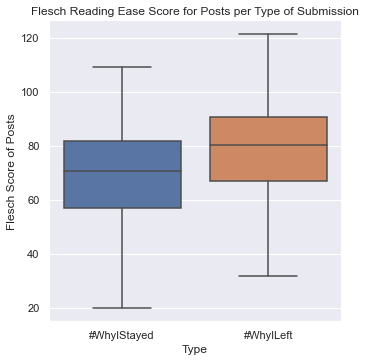

In [68]:
sns.set(rc={'figure.figsize':(6,4)})
ax1=sns.catplot(x='label', y='reading_score', data=df, kind='box', showfliers = False)
ax1.set(xlabel='Type', ylabel='Flesch Score of Posts', title='Flesch Reading Ease Score for Posts per Type of Submission');

In [69]:
df[df.reading_score<-100][['post', 'label']]

,post,label
3059,"""@SolarSailorElan: rT.“@emmanuel_maciel: @Sola...",#WhyIStayed
6367,http://t.co/zItVmy1wfS,#WhyILeft
6384,http://t.co/ZksrxQE3Gy,#WhyILeft
13641,#WhyIStayed should also consider #whywhyistaye...,#WhyIStayed
18091,http://t.co/XCphtwXHWD\n\nSpeechless. #WhyIStayed,#WhyIStayed


In [70]:
from scipy.stats import ttest_ind
ttest_ind(df[df.label=='#WhyIStayed'].reading_score, df[df.label=='#WhyILeft'].reading_score)

Ttest_indResult(statistic=-31.054139086165794, pvalue=1.0299781489551398e-206)

#WhyIStayed posts have a score 10 points less than #WhyILeft posts. #WhyILeft posts have a significantly higher readability.

## Capitalization

In [71]:
df.caps.describe()

count    19552.000000
mean         0.053533
std          0.071939
min          0.000000
25%          0.020619
50%          0.035714
75%          0.060241
max          1.000000
Name: caps, dtype: float64

In [72]:
df.groupby(by=['label']).caps.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
#WhyILeft,5821.0,0.049857,0.070071,0.0,0.020000,0.034483,0.056604,1.0
#WhyIStayed,13731.0,0.055091,0.072662,0.0,0.020833,0.037037,0.061728,1.0


In [73]:
ttest_ind(df[df.label=='#WhyIStayed'].caps, df[df.label=='#WhyILeft'].caps)

Ttest_indResult(statistic=4.654181694850354, pvalue=3.2740418685011523e-06)

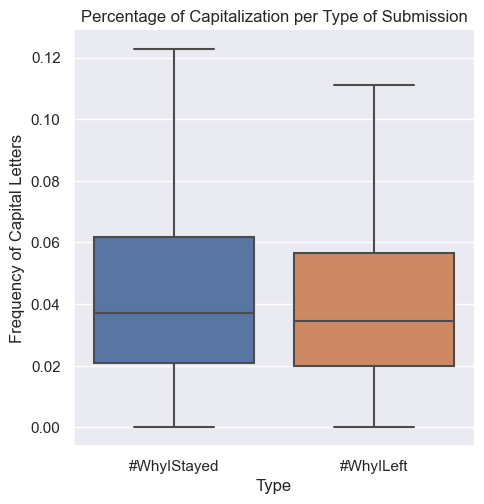

In [74]:
sns.set(rc={'figure.figsize':(6,4)})
ax1=sns.catplot(x='label', y='caps', data=df, kind='box', showfliers = False)
ax1.set(xlabel='Type', ylabel='Frequency of Capital Letters', title='Percentage of Capitalization per Type of Submission');

#WhyIStayed posts contain more capital letters.

In [75]:
df[df.caps>0.95].head()

,post,label,reading_score,processed_post,emojis,mentions,caps,tokens,num_tokens,chars,...,top_sentiment,top_sentiment_words,disgust,surprise,neutral,anger,sad,happy,fear,labels_num
459,YES,#WhyILeft,121.22,YES,0,0,1.0,yes,1,5,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1307,I WOKE UP!!,#WhyILeft,119.19,I WOKE UP!!,0,0,1.0,woke,1,13,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2228,#whyistayed\nTHE MONEEEEE…..!,#WhyIStayed,34.59,\nTHE MONEEEEE…..!,0,0,1.0,moneeeee…,1,17,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2831,"#WhyIStayed I STAYED I GOT BEAT,RAPED, AND MEN...",#WhyIStayed,54.22,"I STAYED I GOT BEAT,RAPED, AND MENTALLY TORN ...",0,0,1.0,stayed beat raped mentally torn apart mentally...,10,96,...,surprise,[beat],0.004088,0.121127,0.000215,0.004518,0.005809,0.004518,0.003657,1
4119,RAN OUTTA FOOD,#WhyILeft,93.81,RAN OUTTA FOOD,0,0,1.0,ran outta food,3,15,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Mentions

In [76]:
df.groupby(by='label').mentions.value_counts(normalize=True)

label        mentions
#WhyILeft    0           0.930253
             1           0.054630
             2           0.011510
             3           0.002405
             4           0.000687
             5           0.000344
             6           0.000172
#WhyIStayed  0           0.863812
             1           0.106183
             2           0.022140
             3           0.005171
             4           0.001311
             5           0.000801
             6           0.000291
             7           0.000218
             11          0.000073
Name: mentions, dtype: float64

In [77]:
from scipy.stats import chi2_contingency
from tabulate import tabulate

In [78]:
def chi2(col, alpha=0.05):
    print('0.0: #WhyILeft, 1.0: #WhyIStayed')
    table=pd.crosstab(df[col], df['labels_num'])
    print(table.to_markdown())
    Xsq=chi2_contingency(table)
    print('H_0: There is no difference between levels of '+str(col)+' based on the labeled hashtag.')
    print('H_1: There is a difference between levels of '+str(col)+' based on the labeled hashtag.')
    print('Chi-square value:', Xsq[0], 'p-value:', Xsq[1], 'dof:', Xsq[2],'\n')
    if Xsq[1]<alpha:
        print('We reject the null hypothesis. \n')
    else: 
        print('We cannot reject the null hypothesis. \n')

In [79]:
chi2(col='mentions')

0.0: #WhyILeft, 1.0: #WhyIStayed
|   mentions |    0 |     1 |
|-----------:|-----:|------:|
|          0 | 5415 | 11861 |
|          1 |  318 |  1458 |
|          2 |   67 |   304 |
|          3 |   14 |    71 |
|          4 |    4 |    18 |
|          5 |    2 |    11 |
|          6 |    1 |     4 |
|          7 |    0 |     3 |
|         11 |    0 |     1 |
H_0: There is no difference between levels of mentions based on the labeled hashtag.
H_1: There is a difference between levels of mentions based on the labeled hashtag.
Chi-square value: 176.19344079796232 p-value: 6.481562087692364e-34 dof: 8 

We reject the null hypothesis. 



## URLs

In [80]:
df['urls']=df.tokens.apply(lambda x: x.count('url'))

In [81]:
df.groupby(by='label').urls.value_counts(normalize=True)

label        urls
#WhyILeft    0       0.942965
             1       0.052912
             2       0.004123
#WhyIStayed  0       0.878450
             1       0.113976
             2       0.007356
             3       0.000146
             4       0.000073
Name: urls, dtype: float64

In [82]:
chi2(col='urls')

0.0: #WhyILeft, 1.0: #WhyIStayed
|   urls |    0 |     1 |
|-------:|-----:|------:|
|      0 | 5489 | 12062 |
|      1 |  308 |  1565 |
|      2 |   24 |   101 |
|      3 |    0 |     2 |
|      4 |    0 |     1 |
H_0: There is no difference between levels of urls based on the labeled hashtag.
H_1: There is a difference between levels of urls based on the labeled hashtag.
Chi-square value: 186.03021981718524 p-value: 3.7778846297884304e-39 dof: 4 

We reject the null hypothesis. 



## Word Length

In [83]:
df.words.describe()

count    19552.000000
mean        16.020254
std          6.930676
min          1.000000
25%         10.000000
50%         16.000000
75%         22.000000
max         34.000000
Name: words, dtype: float64

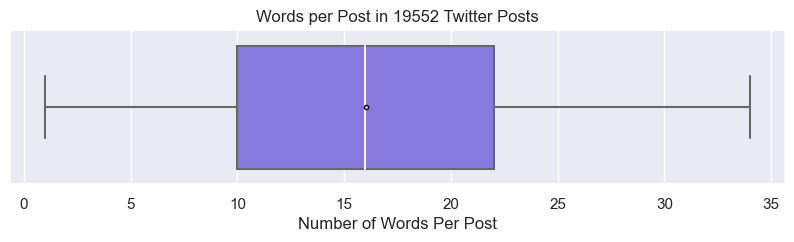

In [84]:
sns.set(rc={'figure.figsize':(10,2)})
b=sns.boxplot(x='words', data=df, showmeans=True, color='mediumslateblue', medianprops={'color':'lavenderblush'}, meanprops={'marker':'.','markerfacecolor':'lavender','markeredgecolor':'black'})
b.set(xlabel='Number of Words Per Post', title='Words per Post in '+str(len(df.post))+' Twitter Posts');

In [85]:
df['avg_word_length']=df.chars/df.words
df.avg_word_length.describe()

count    19552.000000
mean         5.254220
std          0.843308
min          3.000000
25%          4.740741
50%          5.117647
75%          5.600000
max         30.000000
Name: avg_word_length, dtype: float64

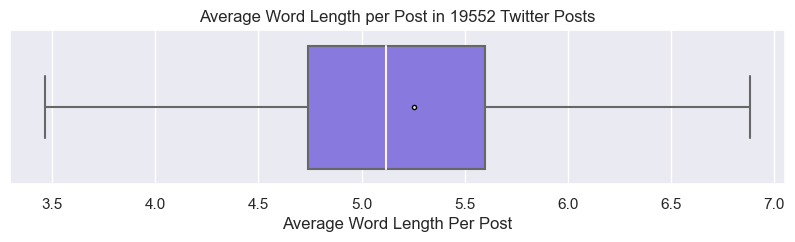

In [86]:
sns.set(rc={'figure.figsize':(10,2)})
b=sns.boxplot(x='avg_word_length', data=df, showfliers = False, showmeans=True, color='mediumslateblue', medianprops={'color':'lavenderblush'}, meanprops={'marker':'.','markerfacecolor':'lavender','markeredgecolor':'black'})
b.set(xlabel='Average Word Length Per Post', title='Average Word Length per Post in '+str(len(df.post))+' Twitter Posts');

## Number of Words

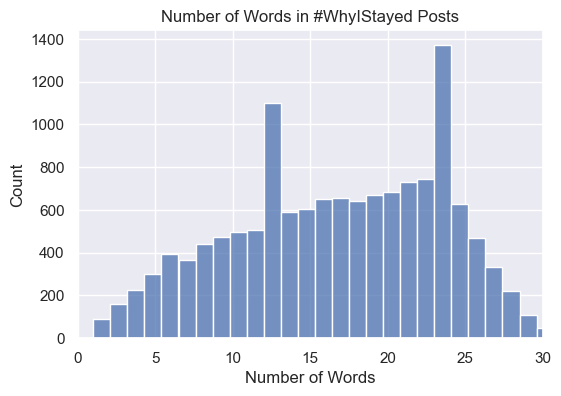

In [87]:
sns.set(rc={'figure.figsize':(6,4)})
b=sns.histplot(x=df[df.label=='#WhyIStayed']['words'], bins=30)
b.set(xlim=(0, 30), xlabel='Number of Words', ylabel='Count', title='Number of Words in #WhyIStayed Posts');

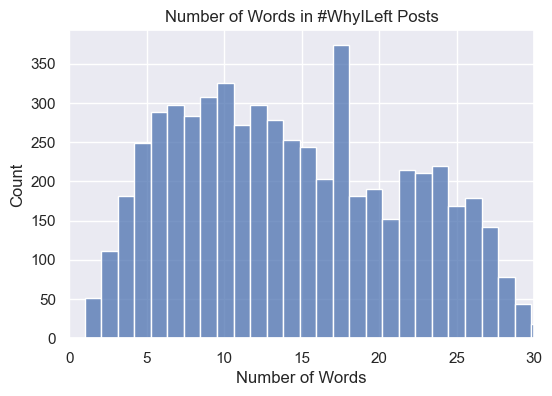

In [88]:
sns.set(rc={'figure.figsize':(6,4)})
b=sns.histplot(x=df[df.label=='#WhyILeft']['words'], bins=30)
b.set(xlim=(0, 30), xlabel='Number of Words', ylabel='Count', title='Number of Words in #WhyILeft Posts');

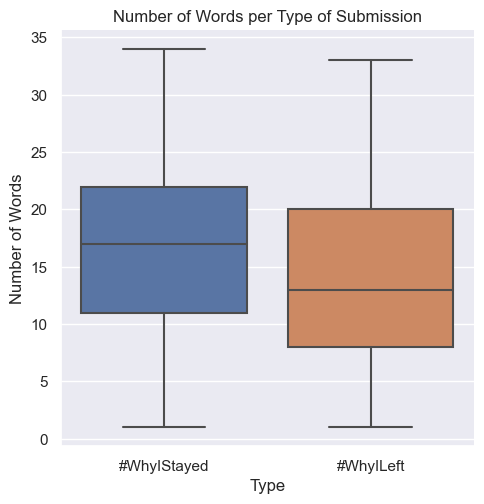

In [89]:
sns.set(rc={'figure.figsize':(6,4)})
ax1=sns.catplot(x='label', y='words', data=df, kind='box', showfliers = False)
ax1.set(xlabel='Type', ylabel='Number of Words', title='Number of Words per Type of Submission');

In [90]:
df.groupby(by=['label']).words.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
#WhyILeft,5821.0,14.407490,7.15469,1.0,8.0,13.0,20.0,33.0
#WhyIStayed,13731.0,16.703955,6.71789,1.0,11.0,17.0,22.0,34.0


In [91]:
ttest_ind(df[df.label=='#WhyIStayed'].words, df[df.label=='#WhyILeft'].words)

Ttest_indResult(statistic=21.432379550969372, pvalue=9.612443219457559e-101)

#WhyIStayed posts contain more words.

## Number of Tokens

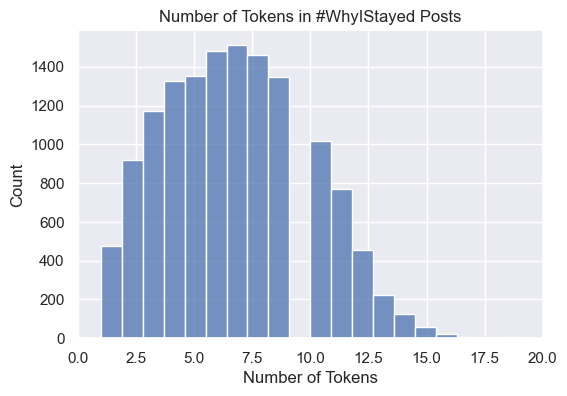

In [92]:
sns.set(rc={'figure.figsize':(6,4)})
b=sns.histplot(x=df[df.label=='#WhyIStayed']['tokens'].str.split(' ').apply(len), bins=20)
b.set(xlim=(0, 20), xlabel='Number of Tokens', ylabel='Count', title='Number of Tokens in #WhyIStayed Posts');

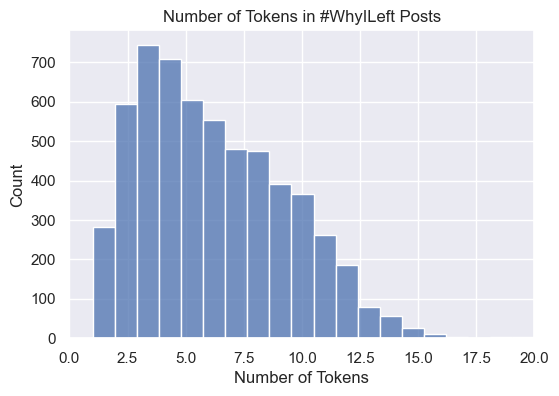

In [93]:
sns.set(rc={'figure.figsize':(6,4)})
b=sns.histplot(x=df[df.label=='#WhyILeft']['tokens'].str.split(' ').apply(len), bins=20)
b.set(xlim=(0, 20), xlabel='Number of Tokens', ylabel='Count', title='Number of Tokens in #WhyILeft Posts');

In [94]:
df.tokens.str.split(' ').apply(len)

0         5
1         8
2         7
3         6
4        11
         ..
19547     3
19548     4
19549     2
19550    15
19551    11
Name: tokens, Length: 19552, dtype: int64

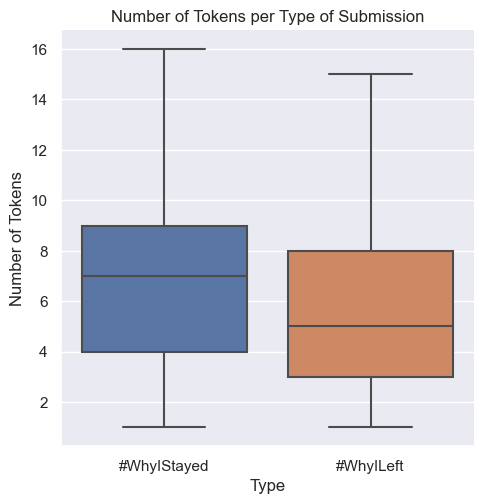

In [95]:
sns.set(rc={'figure.figsize':(6,4)})
ax1=sns.catplot(x='label', y='num_tokens', data=df, kind='box', showfliers = False)
ax1.set(xlabel='Type', ylabel='Number of Tokens', title='Number of Tokens per Type of Submission');

In [96]:
ttest_ind(df[df.label=='#WhyIStayed'].num_tokens, df[df.label=='#WhyILeft'].num_tokens)

Ttest_indResult(statistic=13.476351489163509, pvalue=3.292337059364673e-41)

#WhyIStayed posts have more tokens.

## Emojis

In [97]:
df.groupby(by='label').emojis.value_counts(normalize=True)

label        emojis
#WhyILeft    0         0.988318
             1         0.008933
             2         0.001718
             3         0.000859
             4         0.000172
#WhyIStayed  0         0.990023
             1         0.005972
             2         0.002549
             3         0.001020
             4         0.000146
             5         0.000146
             6         0.000073
             7         0.000073
Name: emojis, dtype: float64

In [98]:
df[df.label=='#WhyIStayed'].emojis.value_counts()

0    13594
1       82
2       35
3       14
4        2
5        2
6        1
7        1
Name: emojis, dtype: int64

In [99]:
df[df.label=='#WhyILeft'].emojis.value_counts()

0    5753
1      52
2      10
3       5
4       1
Name: emojis, dtype: int64

In [100]:
chi2(col='emojis')

0.0: #WhyILeft, 1.0: #WhyIStayed
|   emojis |    0 |     1 |
|---------:|-----:|------:|
|        0 | 5753 | 13594 |
|        1 |   52 |    82 |
|        2 |   10 |    35 |
|        3 |    5 |    14 |
|        4 |    1 |     2 |
|        5 |    0 |     2 |
|        6 |    0 |     1 |
|        7 |    0 |     1 |
H_0: There is no difference between levels of emojis based on the labeled hashtag.
H_1: There is a difference between levels of emojis based on the labeled hashtag.
Chi-square value: 8.291851093132312 p-value: 0.3075636435935379 dof: 7 

We cannot reject the null hypothesis. 



## Sentiments

In [101]:
df[sentiment_order].mean()

anger       0.032899
disgust     0.004988
fear        0.024341
happy       0.030826
neutral     0.002911
sad         0.021010
surprise    0.021336
dtype: float64

In [102]:
df.top_sentiment.notna().sum()

14616

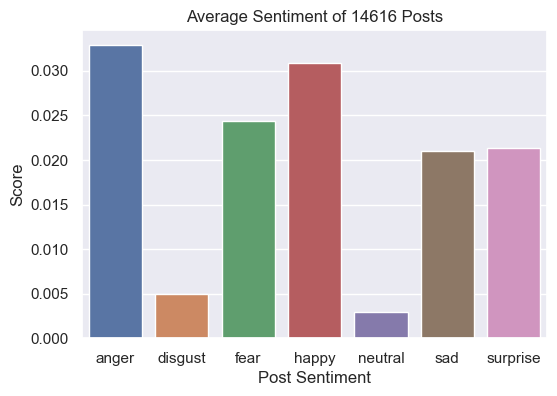

In [103]:
sns.set(rc={'figure.figsize':(6,4)})
b=sns.barplot(x=sentiment_order, y=df[sentiment_order].mean())
b.set(xlabel='Post Sentiment', ylabel='Score', title='Average Sentiment of '+str(df.top_sentiment.notna().sum())+' Posts');

In [104]:
df.groupby('label').top_sentiment.count()

label
#WhyILeft       4304
#WhyIStayed    10312
Name: top_sentiment, dtype: int64

In [105]:
sentiment_df=df.groupby('label')[sentiment_order].mean().transpose().reset_index()
sentiment_df=sentiment_df.rename(columns={'index':'sentiment'})
sentiment_df=pd.melt(sentiment_df, id_vars='sentiment')

In [106]:
sentiment_df

,sentiment,label,value
0,anger,#WhyILeft,0.029438
1,disgust,#WhyILeft,0.004647
2,fear,#WhyILeft,0.025338
3,happy,#WhyILeft,0.033018
4,neutral,#WhyILeft,0.003405
5,sad,#WhyILeft,0.021106
6,surprise,#WhyILeft,0.021497
7,anger,#WhyIStayed,0.034343
8,disgust,#WhyIStayed,0.005130
9,fear,#WhyIStayed,0.023925


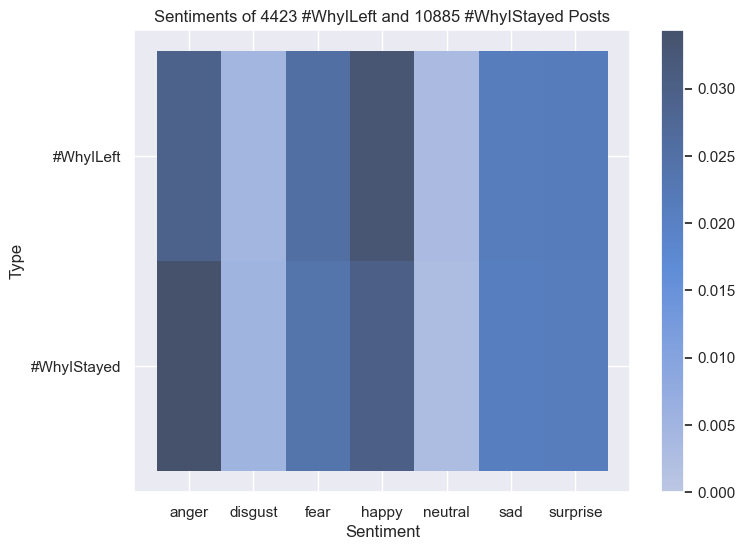

In [107]:
sns.set(rc={'figure.figsize':(8,6)})
h=sns.histplot(x='sentiment', y='label', data=sentiment_df, weights='value', cbar=True)
h.set(xlabel='Sentiment', ylabel='Type', title='Sentiments of 4423 #WhyILeft and 10885 #WhyIStayed Posts');

In [108]:
sentiments=pd.DataFrame(df.groupby('label')[sentiment_order].sum())
sentiments=sentiments.div(sentiments.sum(axis=1), axis=0) #percent stacked
sentiments.head()

,anger,disgust,fear,happy,neutral,sad,surprise
label,,,,,,,
#WhyILeft,0.212629,0.033565,0.183012,0.238487,0.024592,0.152443,0.155271
#WhyIStayed,0.248404,0.037107,0.173053,0.216352,0.019565,0.151678,0.153841


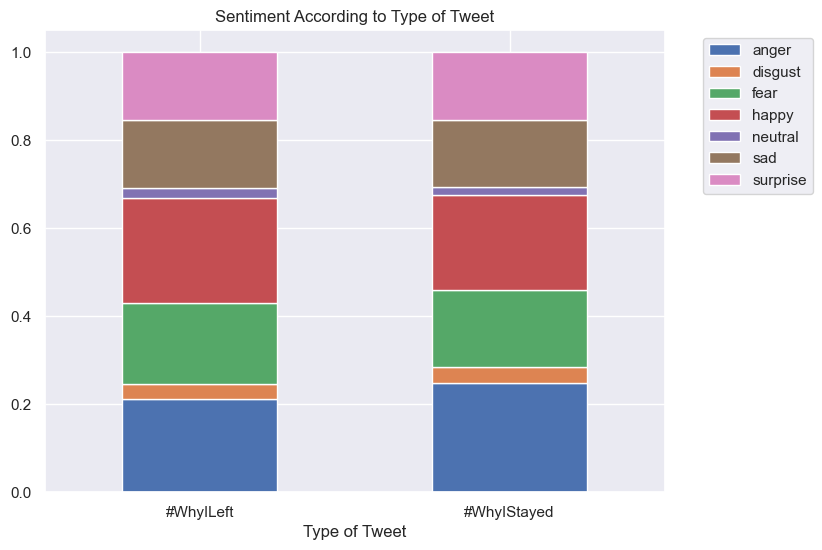

In [109]:
ax=sentiments.plot(kind='bar', stacked=True, legend='reverse')
ax.set(xlabel='Type of Tweet', title='Sentiment According to Type of Tweet')
plt.legend(bbox_to_anchor=(1.05,1))
plt.xticks(rotation=0);

### Happy

In [110]:
df[(df.top_sentiment=='happy')&(df.label=='#WhyILeft')].top_sentiment_words

3                             [love]
14                            [love]
15                          [better]
21                            [love]
22          [better, better, wanted]
                    ...             
19454                         [love]
19486    [powerful, taken, together]
19499        [taken, daughter, knew]
19539                       [better]
19543                [worth, wanted]
Name: top_sentiment_words, Length: 1724, dtype: object

In [111]:
happy_words_left=[word for lst in df[(df.top_sentiment=='happy')&(df.label=='#WhyILeft')].top_sentiment_words for word in lst]

In [112]:
from collections import Counter
Counter(happy_words_left).most_common(10)

[('love', 479),
 ('better', 390),
 ('worth', 143),
 ('knew', 120),
 ('god', 94),
 ('daughter', 90),
 ('wanted', 83),
 ('never', 67),
 ('happy', 64),
 ('good', 63)]

In [113]:
df.post[21] #love

'@AC360 I loved him, but I learned to love myself enough to stop allowing him to treat me that way #WhyILeft'

In [114]:
df.post[22] #better #better #wanted

'I wanted a better life for my son of happiness, no fighting, and to prove I am better then that #whyileft'

In [115]:
df.post[41] #respect #love #opportunity #fair

'To give my son the fair opportunity to learn to respect women, mothers, and me. And because I love him. #WhyILeft http://t.co/t3LRhoNkVl'

In [116]:
df.post[56] #love

' because I gained the courage to love myself. #Enddomesticviolence'

In [117]:
df.post[85] #better #good

'#whyileft good friends helped me finally see that I deserve better'

In [118]:
df.post[144] #better

' Risking having nothing and surviving was better than dying.'

In [119]:
happy_words_stayed=[word for lst in df[(df.top_sentiment=='happy')&(df.label=='#WhyIStayed')].top_sentiment_words for word in lst]
Counter(happy_words_stayed).most_common(10)

[('love', 925),
 ('better', 477),
 ('believe', 360),
 ('good', 271),
 ('relationship', 144),
 ('need', 128),
 ('marriage', 126),
 ('never', 122),
 ('worth', 100),
 ('wanted', 93)]

In [120]:
df.post[23] #love #true

'Because it was "true love" if it hurt, and the way I was treated was "my fault" #WhyIStayed'

In [121]:
df.post[91] #love #love #true #wish #despite

"Because, despite what you wish were true, you love the person who hurts you. The love doesn't just go away. #WhyIStayed"

In [122]:
df.post[65] #better #believe #daughter

'#WhyIStayed   he made me believe I was the only one who could help him "get better". I thought he should be there 4 our daughter.'

In [123]:
df.post[88] #better

"#WhyIStayed I didn't think I deserved any better."

In [124]:
df.post[65] #better #believe #daughter

'#WhyIStayed   he made me believe I was the only one who could help him "get better". I thought he should be there 4 our daughter.'

#WhyILeft posts had a higher percentage of the happy sentiment. The word *love*, the most common word in both types of happy posts, is directed towards the self in #WhyILeft, but is directed towards the abuser in #WhyIStayed. *Better* is the second common word and is used in a hopeful manner towards the future in #WhyILeft (while *believe* is also used as a sign of hope in #WhyIStayed) In contrast, it is often used as a personal adjective in #WhyIStayed. *Daughter* was a factor in why people left abusive relationships, but *marriage* was also an indication of why people stay. 

### Anger

In [125]:
angry_words_left=[word for lst in df[(df.top_sentiment=='anger')&(df.label=='#WhyILeft')].top_sentiment_words for word in lst]
Counter(angry_words_left).most_common(10)

[('abuse', 357),
 ('leave', 144),
 ('knew', 119),
 ('wanted', 107),
 ('wrong', 81),
 ('never', 63),
 ('daughter', 58),
 ('bad', 56),
 ('tried', 54),
 ('became', 48)]

In [126]:
df[(df.top_sentiment=='anger') & (df.post.str.contains('wrong')) & (df.label=='#WhyILeft')][['post', 'top_sentiment_words']].head(20)

,post,top_sentiment_words
420,I realized I was wrong. #WhyILeft,[wrong]
1393,Someone proved him wrong 😉✌️✌️,[wrong]
1443,I knew he was wrong.,"[wrong, knew]"
1553,#whyileft I knew by staying I was sending my d...,"[wrong, knew, daughter]"
1594,#whyIleft!!!!! Keep the conversation going!!!!...,"[abuse, wrong, keep]"
1942,Only took once had a lil girl to teach that ev...,"[wrong, together, good, love]"
2226,- I realized he was wrong.,[wrong]
2290,Because he was wrong.I was stronger than I rea...,"[wrong, daughter]"
2418,Because I realized there was something wrong ...,[wrong]
2824,I knew I had to give myself the chance to pro...,"[wrong, knew]"


In [127]:
df.post[226] #abuse #became #knew #daughter

"#WhyILeft , I became brave for my daughters, so they knew it wasn't okay to live with abuse."

In [128]:
df.post[241] #abuse #able

'I was finally able to realize that abuse comes in many different forms. #whyileft'

In [129]:
df.post[1029] #leave

'No surprise that Oct. is #BullyingPreventionMonth &amp; National #domesticviolence awareness month. Abusive spouse is often a bully. #WhyIStayed'

In [130]:
df.post[3444] #wrong

'Back when I was in an abusive relationship it felt like he was all I had even though he controlled everything. that is #WhyIStayed with him.'

In [131]:
df.post[5203] #wrong

' we got home one day to a shotgun and note "You\'re lucky you weren\'t home"'

In [132]:
angry_words_stayed=[word for lst in df[(df.top_sentiment=='anger')&(df.label=='#WhyIStayed')].top_sentiment_words for word in lst]
Counter(angry_words_stayed).most_common(10)

[('abuse', 1243),
 ('leave', 727),
 ('bad', 210),
 ('wrong', 197),
 ('knew', 182),
 ('wanted', 176),
 ('tried', 172),
 ('never', 170),
 ('love', 131),
 ('hit', 114)]

In [133]:
df.post[42] #abuse #leave #fear

'A1: Fear of Retaliation. Often abuse escalates when the victim tries to leave #TEARtalk #WhyIStayed'

In [134]:
df.post[163] #leave #age

"#WhyIStayed occurred between the ages of 9-17. Where was I supposed to go? It was the 80s, there were few resources. I wouldn't leave my bro"

In [135]:
df.post[230] #wrong #certainly

"#WhyIStayed I was 13. How was I supposed to know what he did to me was wrong? I certainly wasn't told in school."

In [136]:
df.post[679] #wrong #love

"Ricky Williams smoked like Willie Nelson... wasnt suspended indefinitly tho'... #WhyIStayed"

In [137]:
df.post[37] #wanted

'Because what if no one else wanted me. #WhyIStayed'

#WhyIStayed posts had a higher percentage of the angry sentiment (they often contained reminiscent posts of people explaining why they stayed, years after the abuse). *Abuse* and *leave* were the most common words in both types of "angry" posts. #WhyILeft posts denote a change in perspective in viewing abuse, while #WhyIStayed posts denote a lack of inner awareness and/or outer validation. The word *wrong* in #WhyILeft posts was used as a direct identifier of a situation, but in #WhyIStayed posts, it suggests an absence of this identification.

In [138]:
df.to_excel("Final_twitter.xlsx") #save data for future modeling

In [139]:
df.shape

(19552, 23)